# ***Data Science Engineering Methods***

# ***Assignment 1 - ML Data Cleaning and Feature Selection***


In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

Scoring Rubric

Are my answers supported with data? (20 Points)

Tables, graphs, and charts must support your evaluation/answers.

It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)



Public dataset (5 Points)

Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.



What code is yours and what have you adapted? (5 Points)

You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.



Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.



Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.



Answers to listed questions (45 Points)



* Which independent variables are useful to predict a target (dependent variable)?

* Which independent variable have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

Notes:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013)Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

# **ABSTRACT**

1. *Person ID*: A unique identifier for each individual in the dataset.

2. *Gender*: The gender of the individual, categorized as either "Male" or another value if applicable.

3. *Age*: The age of the individual, represented in years.

4. *Occupation*: The occupation or profession of the individual, such as "Software Engineer," "Doctor," or "Sales Representative."

5. *Sleep Duration*: The average duration of sleep per night in hours.

6. *Quality of Sleep*: A rating of the quality of sleep on a scale, possibly ranging from 1 to 10, where higher values indicate better sleep quality.

7. *Physical Activity Level*: A measure of the individual's physical activity, possibly on a scale from low to high, with specific values like "30" and "60" indicating the activity level.

8. *Stress Level*: The level of stress experienced by the individual, typically measured on a scale, with higher values indicating higher stress levels.

9. *BMI Category*: The Body Mass Index (BMI) category of the individual, categorized as "Overweight," "Normal," or "Obese" based on their BMI value.

10. *Blood Pressure*: The individual's blood pressure, usually represented as two values - systolic and diastolic, e.g., "126/83."

11. *Heart Rate*: The resting heart rate of the individual, typically measured in beats per minute (BPM).

12. *Daily Steps*: The number of steps taken by the individual on a daily basis as a measure of physical activity.

13. *Sleep Disorder*: Any sleep disorders or conditions reported by the individual, such as "Sleep Apnea" or "Insomnia." Multiple disorders are separated by commas.


# DATASET
The Sleep Health and Lifestyle Dataset comprises total of 372 observations.This dataset appears to contain information related to the health and lifestyle of various individuals, including their sleep patterns, physical activity, and health conditions. It could be used for various analyses and insights related to health and well-being.

In [ ]:
# installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=cb616f74c6d0315194925ca7c9639fd08bf90d2e727cb349e7ca5cc4a66b129e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
#Importing required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the ablone dataset
# Provide the raw GitHub URL of the CSV file
csv_url = "https://raw.githubusercontent.com/Akanksha-Nakati/Data-Science-Engineering-Methods/main/Sleep_health_and_lifestyle_dataset.csv"

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_url)


Here, using pandas library i have extracted the csv file through github

In [ ]:
# Viewing data in the file
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


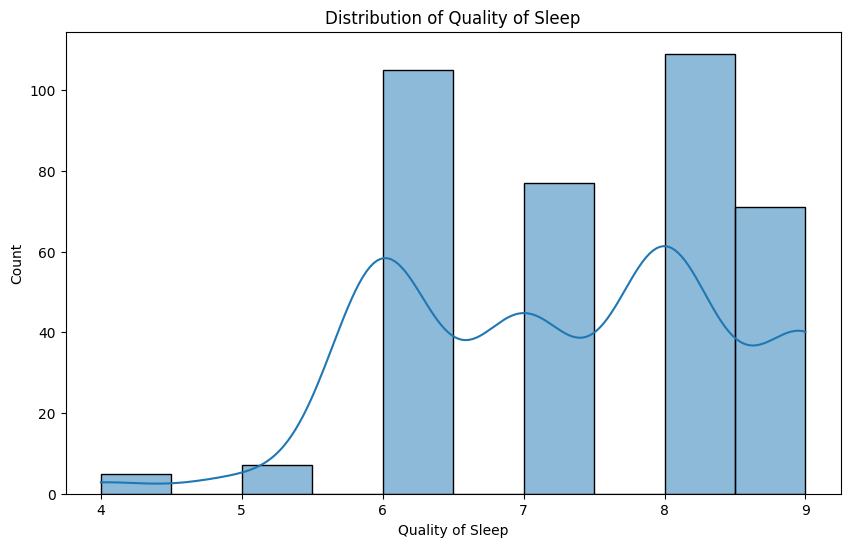

In [ ]:
#Plotting the distribution for
data['Quality of Sleep'].value_counts()

df = pd.DataFrame(data)

# Plot the distribution of "Quality of Sleep"
plt.figure(figsize=(10,6))
sns.histplot(df['Quality of Sleep'], kde=True, bins=10)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()



Quality of Sleep is rated from 4 to 9 which determines the sleep health.

In [ ]:
# Checking for missing values in each column and calculate the total count
missing_data = data.isnull().sum()

In [ ]:
def convert_Quality_of_Sleep(x):
    if x == '4':
        return "Okay"
    elif x == '5':
        return "Good"
    elif x == '6':
        return "Better"
    elif x == '7':
        return "Best"
    elif x == '8':
        return "Excellent"
    else:
        return "Awesome"


In [ ]:
data['Quality of Sleep'] = data['Quality of Sleep'].apply(convert_Quality_of_Sleep)

In [ ]:
# checking if the any data is missing
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

None of the variable column has any missing data

In [ ]:

#Reading first 5 rows after renaming the column diagnosis
data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,Awesome,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,Awesome,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,Awesome,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,Awesome,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,Awesome,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:

# Checking the data types of each column
data.dtypes


Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep            object
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
#Getting the list of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#Getting the list of numerical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
#Printing the list of categorical and numerical columns
print("Numerical Variables")
print(f'Total number of numerical variables in our dataset: {len(numerical_cols)}')
for row,col in enumerate(numerical_cols):
    print(f'{row+1}. {col}')
print("\n")
print("Categorical Variables")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for row,col in enumerate(categorical_cols):
    print(f'{row+1}. {col}')



Numerical Variables
Total number of numerical variables in our dataset: 7
1. Person ID
2. Age
3. Sleep Duration
4. Physical Activity Level
5. Stress Level
6. Heart Rate
7. Daily Steps


Categorical Variables
Total number of categorical variables in our dataset: 6
1. Gender
2. Occupation
3. Quality of Sleep
4. BMI Category
5. Blood Pressure
6. Sleep Disorder


# **Are there any missing values? Which Independent variable have missing data ? How much?**#

In [ ]:

#Checking missing values in our data
data.isnull().sum()


Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

There are no missing values in any column

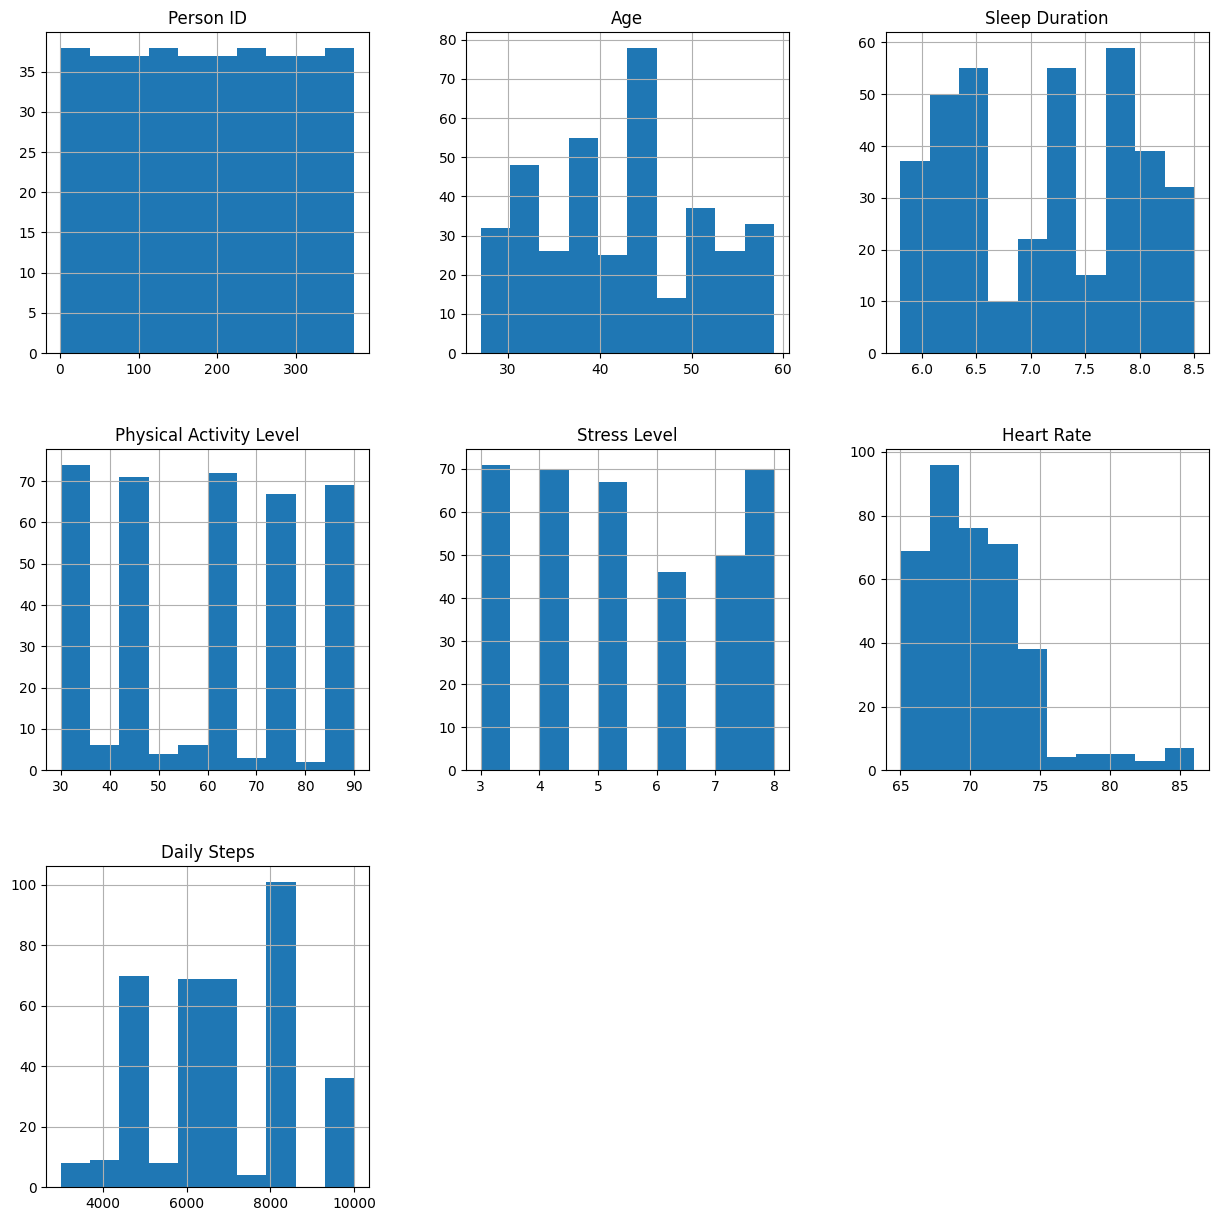

In [ ]:
#generating histograms
plot = data.hist(figsize=(15,15))

Here, by looking at the histograms, It appears that mostly all independent variables follow binomial distribution

In [ ]:
# Dropping the dependent variable from the dataframe to obtain the distributions of independent variables
datafinal = data.drop('Quality of Sleep', axis=1)


# **Distribution of Predictor Variables**

Skipping distribution plot for Blood Pressure as it's non-numeric.


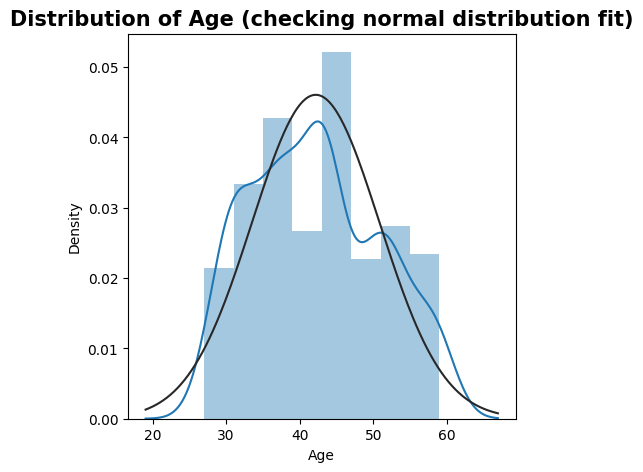

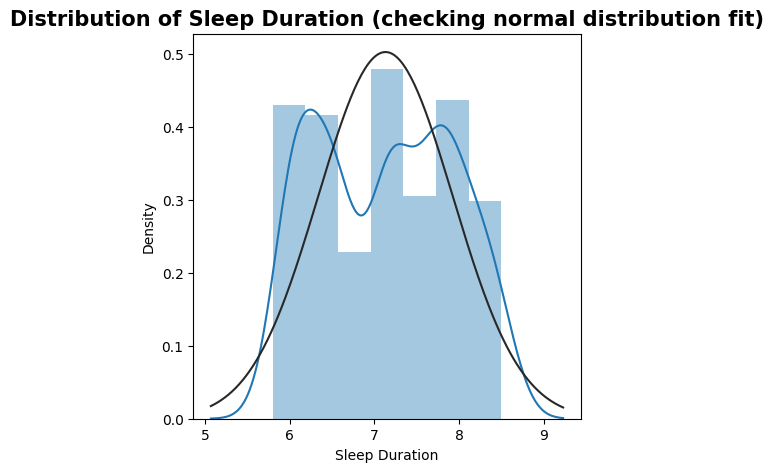

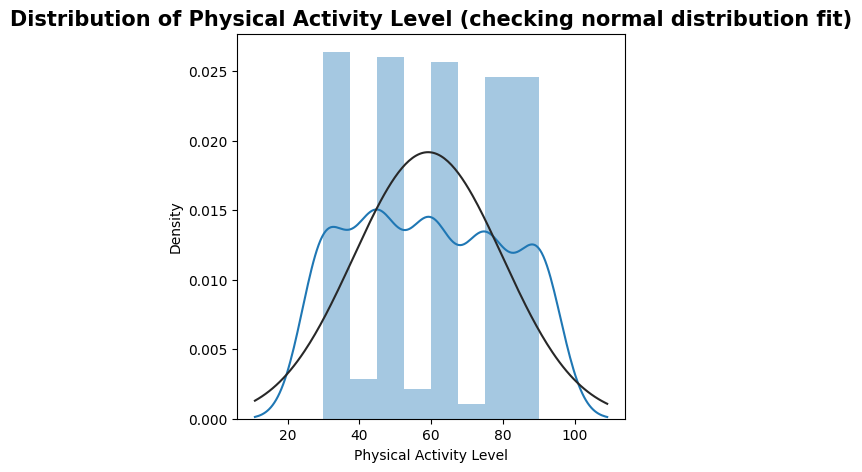

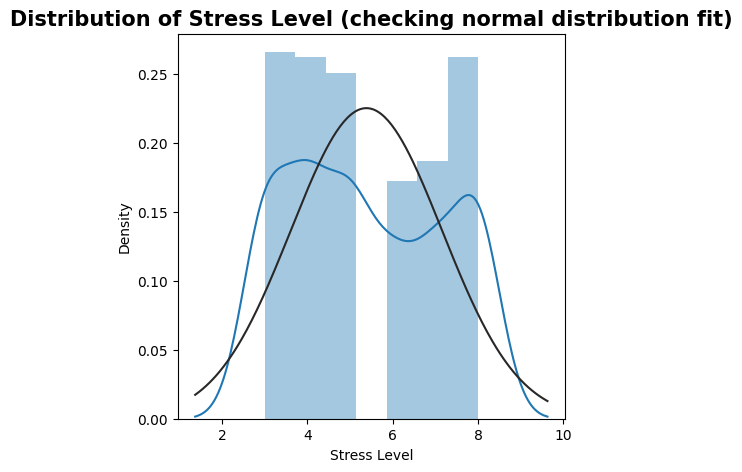

<Figure size 500x500 with 0 Axes>

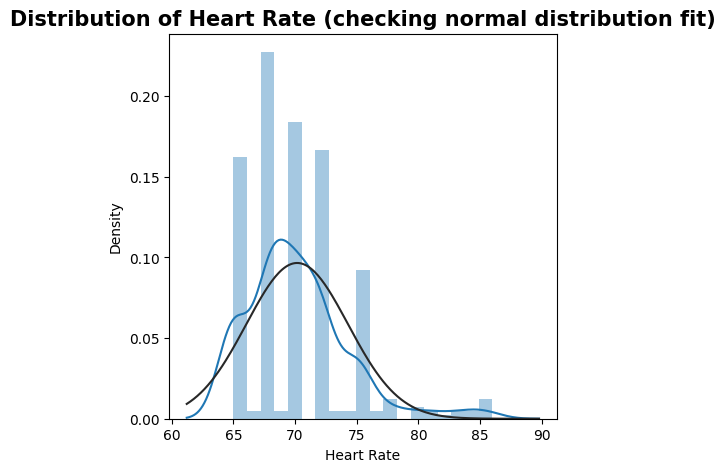

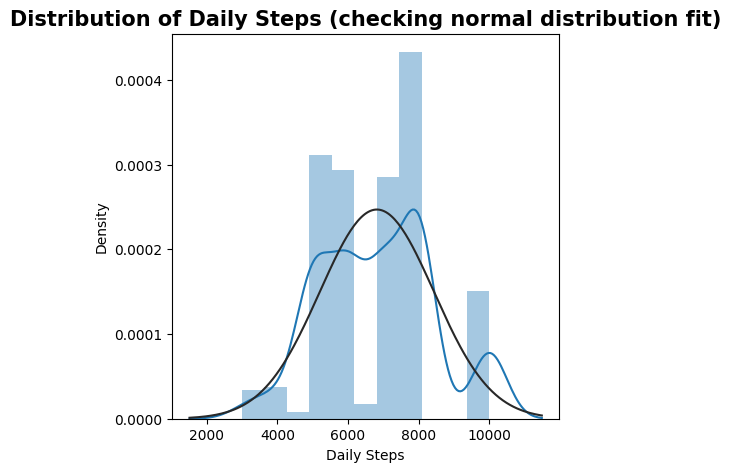

In [ ]:
ataframe
for i in datalist:
    from scipy import stats
    plt.figure(figsize=(5,5))

    # Check if the column data is string type (e.g., Blood Pressure). If so, skip it.
    if isinstance(data[i][0], str):
        print(f"Skipping distribution plot for {i} as it's non-numeric.")
        continue

    sns.distplot(data[i], fit=stats.norm)
    plt.title(f"Distribution of {i} (checking normal distribution fit)",
              size=15, weight="bold")


The distribution plots are created for the columns. It identifies whether the data in each column is numerical and, if it is, overlay the histogram of the data with a normal distribution curve which enables a visual inspection of the data's normality.

# **Observations:**


All the above histogram are roughly unimodal distribution.Only physical activity has a symmetric distribution and Heart rate has a right skewed distribution



## What are the likely distributions of the numeric variables?

The mean of 'Sleep Duration' is  7.13
The median of 'Sleep Duration' is  7.2
The mode of 'Sleep Duration' is  7.2


Text(0.5, 1.0, 'Distribution curve for Sleep Duration')

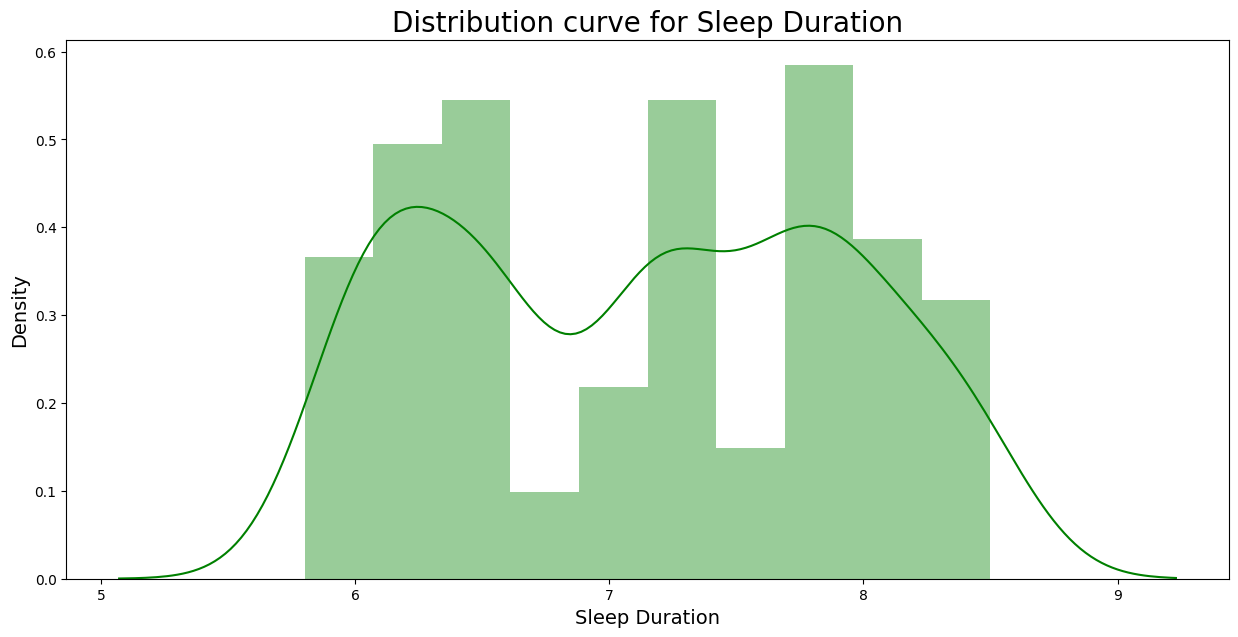

The mean of 'Sleep Duration' is  7.13
The median of 'Sleep Duration' is  7.2
The mode of 'Sleep Duration' is  7.2


Text(0.5, 1.0, 'Distribution curve for Sleep Duration')

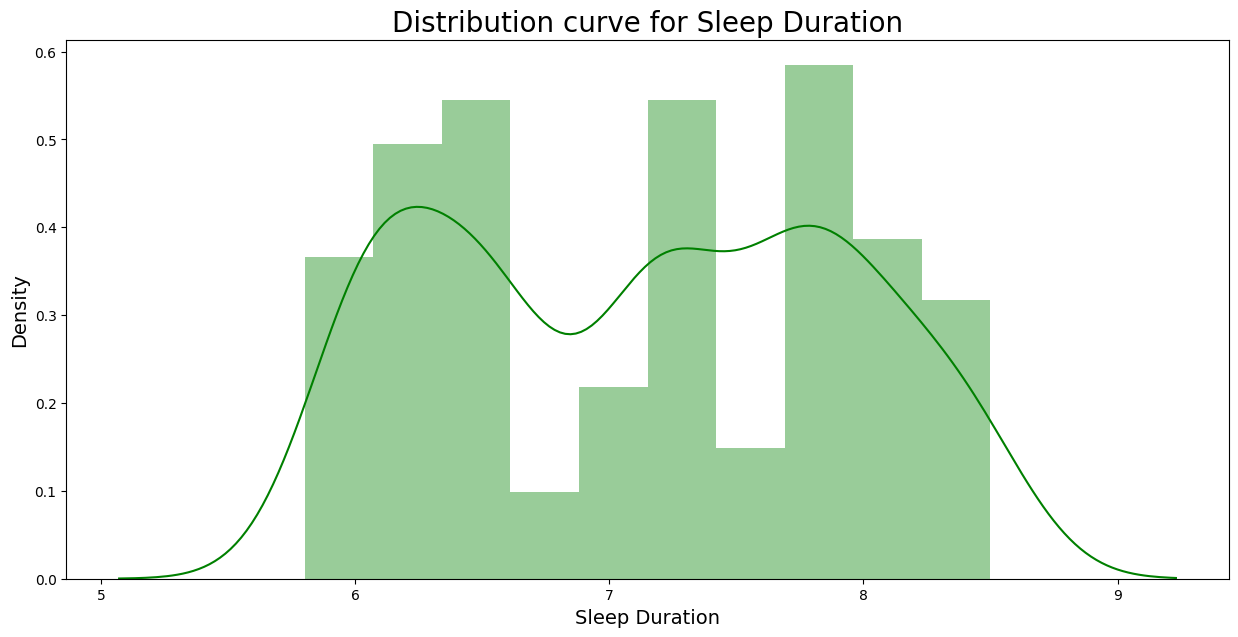

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['Sleep Duration'], bins=10, color="green")
print("The mean of 'Sleep Duration' is ", round(data['Sleep Duration'].mean(), 2))
print("The median of 'Sleep Duration' is ", data['Sleep Duration'].median())
print("The mode of 'Sleep Duration' is ", data['Sleep Duration'].mode().iloc[0])
plt.xlabel("Sleep Duration", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Sleep Duration', size=20)


The mean of 'Stress Level' is  5.39
The median of 'Stress Level' is  5.0
The mode of 'Stress Level' is  3


Text(0.5, 1.0, 'Distribution curve for Stress Level')

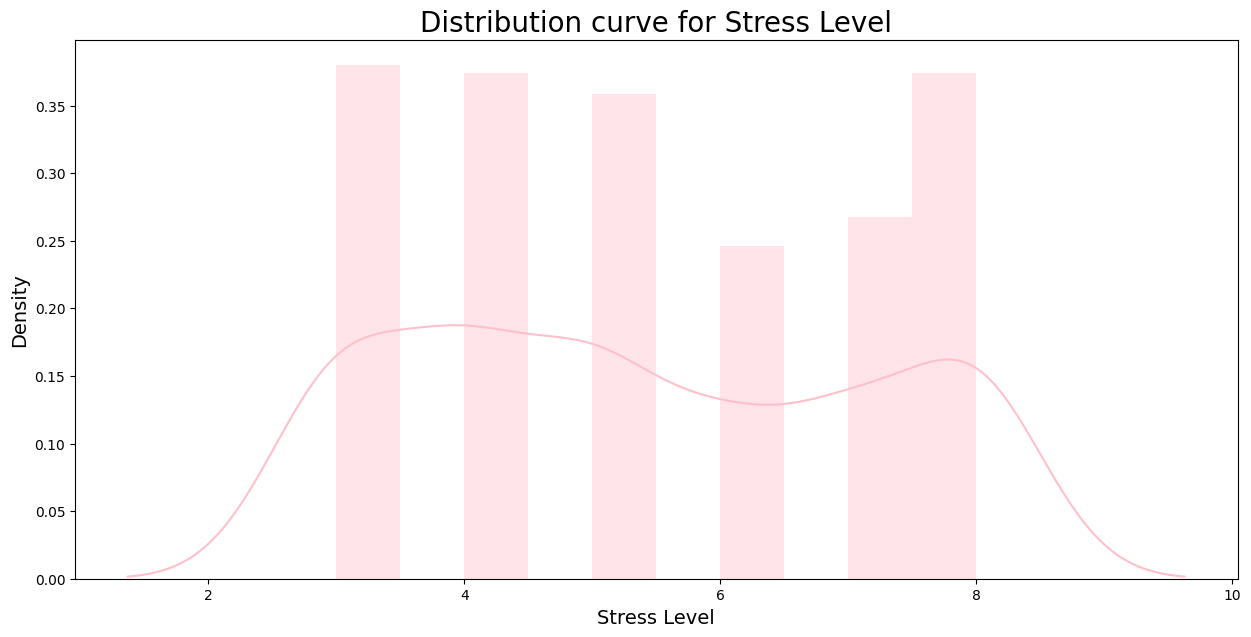

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['Stress Level'], bins=10, color="pink")
print("The mean of 'Stress Level' is ", round(data['Stress Level'].mean(), 2))
print("The median of 'Stress Level' is ", data['Stress Level'].median())
print("The mode of 'Stress Level' is ", data['Stress Level'].mode().iloc[0])  # .iloc[0] to display the first mode, if there are multiple
plt.xlabel("Stress Level", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Stress Level', size=20)

The mean of 'Age' is  42.18
The median of 'Age' is  43.0
The mode of 'Age' is  43


Text(0.5, 1.0, 'Distribution curve for Age')

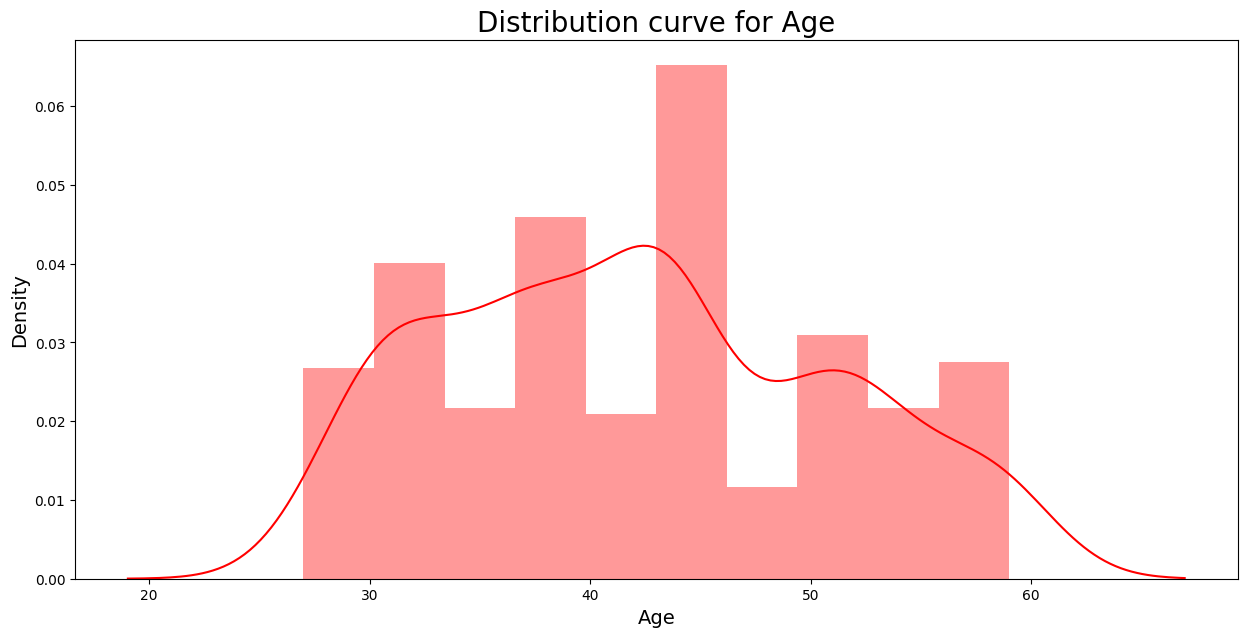

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['Age'], bins=10, color="red")
print("The mean of 'Age' is ", round(data['Age'].mean(), 2))
print("The median of 'Age' is ", data['Age'].median())
print("The mode of 'Age' is ", data['Age'].mode().iloc[0])  # .iloc[0] to display the first mode, if there are multiple
plt.xlabel("Age", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Age', size=20)

The mean of 'Physical Activity Level' is  59.17
The median of 'Physical Activity Level' is  60.0
The mode of 'Physical Activity Level' is  60


Text(0.5, 1.0, 'Distribution curve for Physical Activity Level')

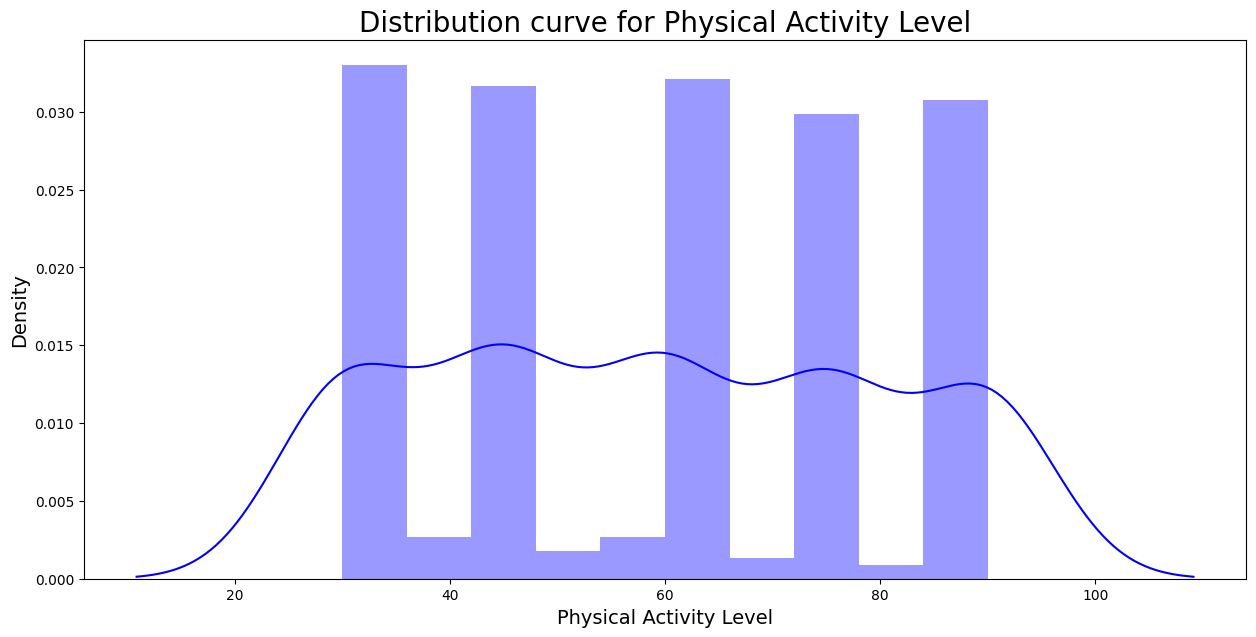

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['Physical Activity Level'], bins=10, color="blue")
print("The mean of 'Physical Activity Level' is ", round(data['Physical Activity Level'].mean(), 2))
print("The median of 'Physical Activity Level' is ", data['Physical Activity Level'].median())
print("The mode of 'Physical Activity Level' is ", data['Physical Activity Level'].mode().iloc[0])  # .iloc[0] to display the first mode, if there are multiple
plt.xlabel("Physical Activity Level", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Physical Activity Level', size=20)


The mean of 'Heart Rate' is  70.17
The median of 'Heart Rate' is  70.0
The mode of 'Heart Rate' is  68


Text(0.5, 1.0, 'Distribution curve for Heart Rate')

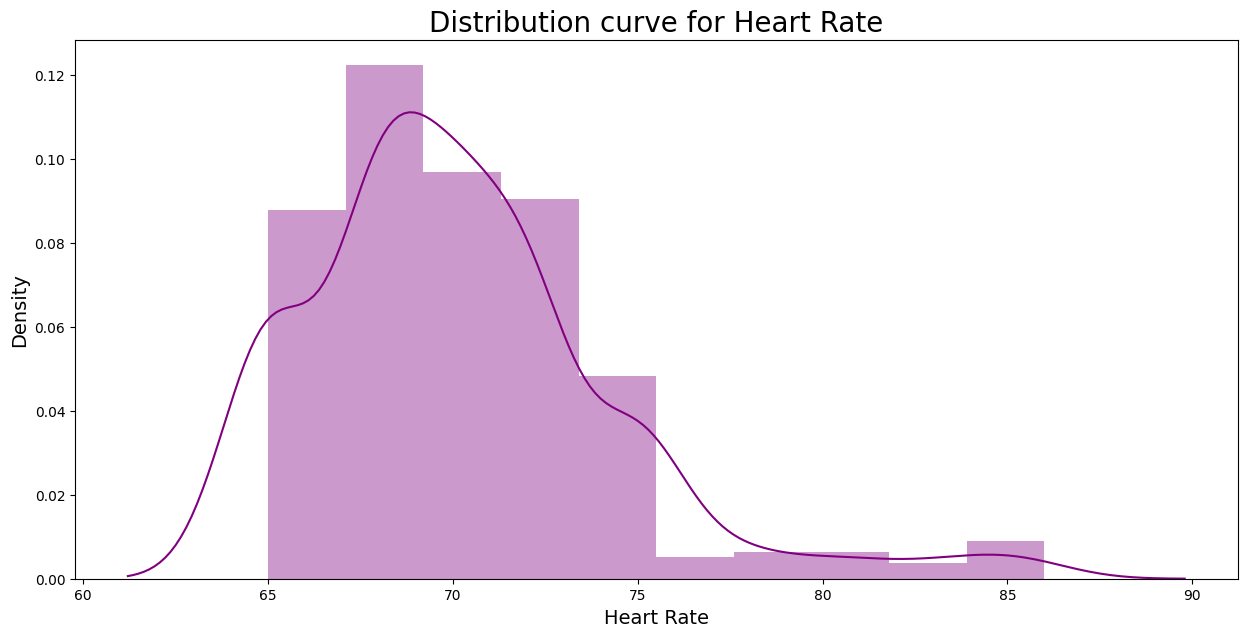

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['Heart Rate'], bins=10, color="purple")
print("The mean of 'Heart Rate' is ", round(data['Heart Rate'].mean(), 2))
print("The median of 'Heart Rate' is ", data['Heart Rate'].median())
print("The mode of 'Heart Rate' is ", data['Heart Rate'].mode().iloc[0])  # .iloc[0] to display the first mode, if there are multiple
plt.xlabel("Heart Rate", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Heart Rate', size=20)


The mean of 'Daily Steps' is  6816.84
The median of 'Daily Steps' is  7000.0
The mode of 'Daily Steps' is  8000


Text(0.5, 1.0, 'Distribution curve for Daily Steps')

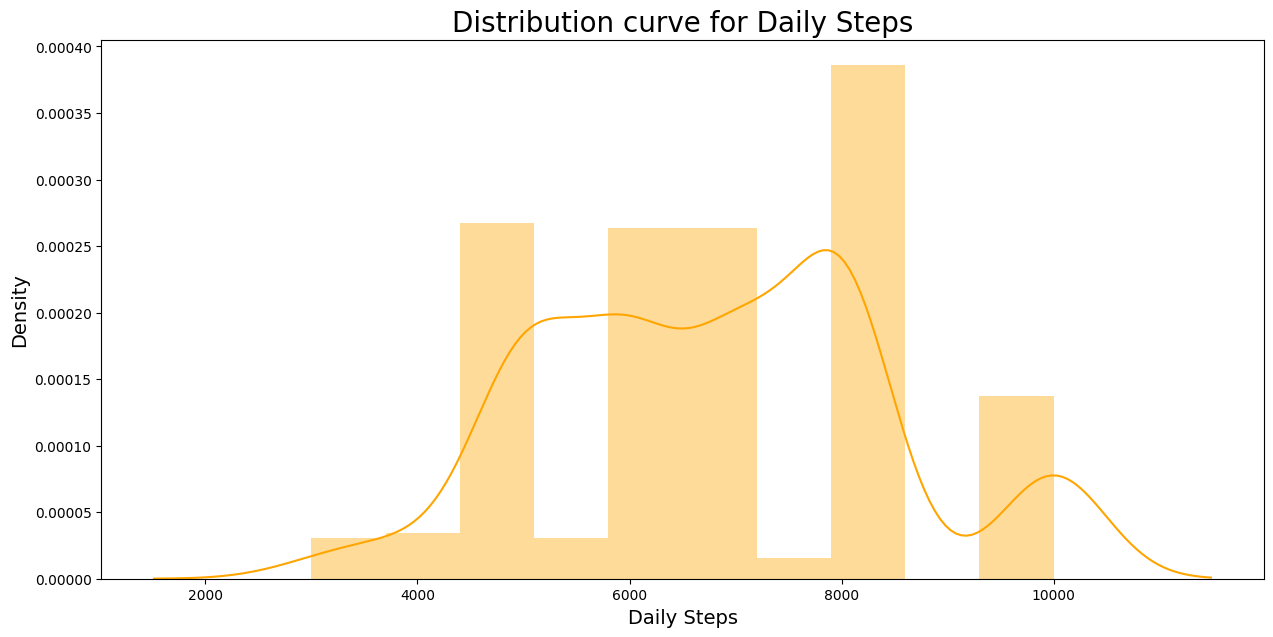

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(data['Daily Steps'], bins=10, color="orange")
print("The mean of 'Daily Steps' is ", round(data['Daily Steps'].mean(), 2))
print("The median of 'Daily Steps' is ", data['Daily Steps'].median())
print("The mode of 'Daily Steps' is ", data['Daily Steps'].mode().iloc[0])  # .iloc[0] to display the first mode, if there are multiple
plt.xlabel("Daily Steps", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Daily Steps', size=20)

## Do the range of the predictor variables make sense?

        Person ID         Age  Sleep Duration  Physical Activity Level  \
count  374.000000  374.000000      374.000000               374.000000   
mean   187.500000   42.184492        7.132086                59.171123   
std    108.108742    8.673133        0.795657                20.830804   
min      1.000000   27.000000        5.800000                30.000000   
25%     94.250000   35.250000        6.400000                45.000000   
50%    187.500000   43.000000        7.200000                60.000000   
75%    280.750000   50.000000        7.800000                75.000000   
max    374.000000   59.000000        8.500000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000.000000  
25%        4.000000   68.000000   5600.000000  
50%        5.000000   70.000000   7000.000000

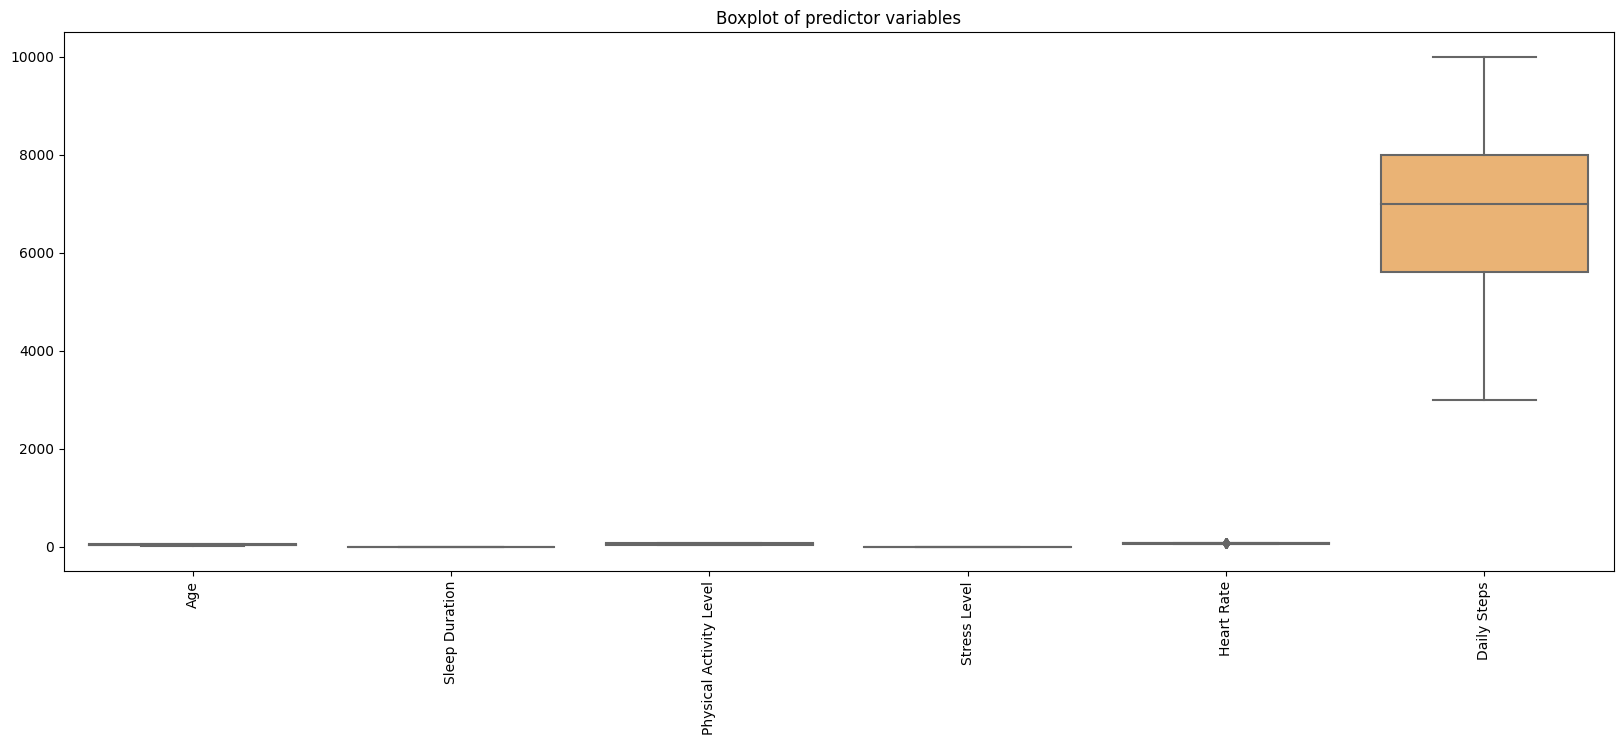

In [ ]:
# Generate statistical summary for each numerical column
print(data.describe())

# Plotting the boxplot for visual inspection
plt.figure(figsize=(20,7))
# Filter out non-numerical columns
numerical_data = data[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]
sns.boxplot(data=numerical_data, palette="Set3")
plt.title('Boxplot of predictor variables')
plt.xticks(rotation=90)
plt.show()


Here, we can observe that

Age:

The minimum age in the dataset is 27.
The maximum age is 59.
The age range is from 27 to 59 years.

Sleep Duration:

The minimum sleep duration is 5.8 hours.
The maximum sleep duration is 8.5 hours.
The sleep duration range is from 5.8 to 8.5 hours.

Physical Activity Level:

The minimum physical activity level is 30.
The maximum physical activity level is 90.
The activity level range is from 30 to 90.

Stress Level:

The minimum stress level is 3.
The maximum stress level is 8.
The stress level range is from 3 to 8.
Heart Rate:

The minimum heart rate is 65.
The maximum heart rate is 86.
The heart rate range is from 65 to 86.

Daily Steps:

The minimum daily steps are 3,000.
The maximum daily steps are 10,000.
The daily steps range is from 3,000 to 10,000.








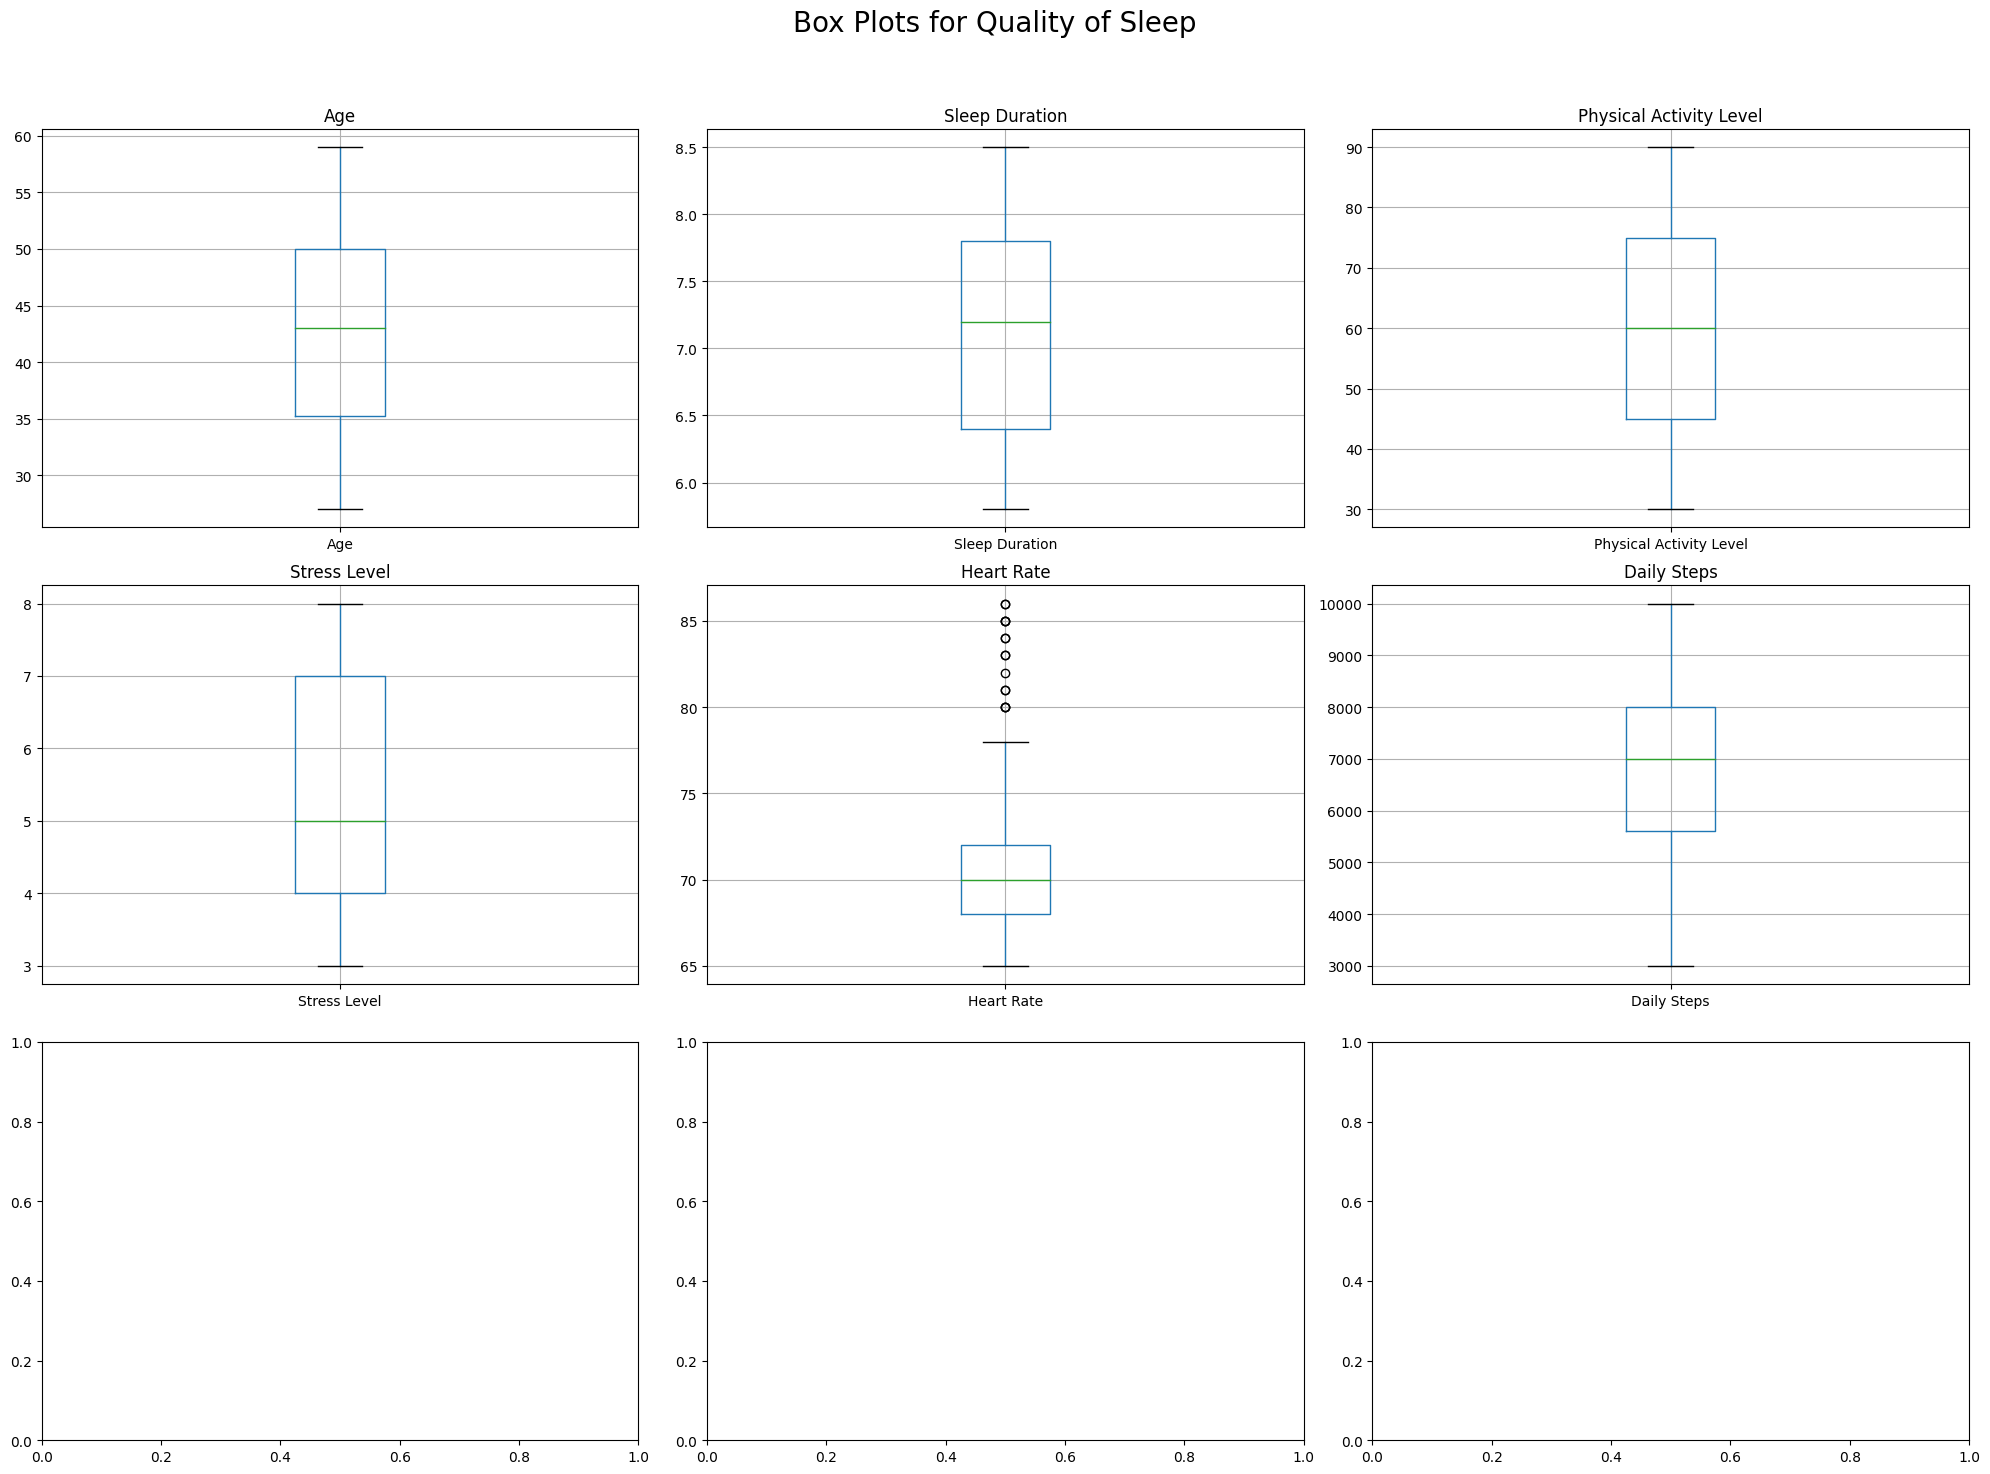

In [ ]:
import matplotlib.pyplot as plt

# Creating individual box plots for each numeric variable
# Adjusting based on the number of numerical columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Box Plots for Quality of Sleep', fontsize=20)

# Considering only numerical columns for the box plot
numerical_columns = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_columns):
        data.boxplot(column=numerical_columns[i], ax=ax)
        ax.set_title(numerical_columns[i])

plt.tight_layout()
plt.subplots_adjust(top=0.9) # Adjusting the space to fit the suptitle
plt.show()

In [ ]:
#preparing the data for modeling
from sklearn import preprocessing
import pandas as pd

# Normalize specific columns
columns_to_normalize = [
    'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
    'Heart Rate', 'Daily Steps'
]

# Create x to store values as floats
x = data[columns_to_normalize].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Replace the original columns with normalized values in the DataFrame
data[columns_to_normalize] = pd.DataFrame(x_scaled, columns=columns_to_normalize)


In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.474515,0.493365,0.486185,0.477005,0.245989,0.545264
std,108.108742,0.271035,0.294688,0.347180,0.354905,0.196937,0.231131
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.250000,0.257812,0.222222,0.250000,0.200000,0.142857,0.371429
50%,187.500000,0.500000,0.518519,0.500000,0.400000,0.238095,0.571429
75%,280.750000,0.718750,0.740741,0.750000,0.800000,0.333333,0.714286
max,374.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


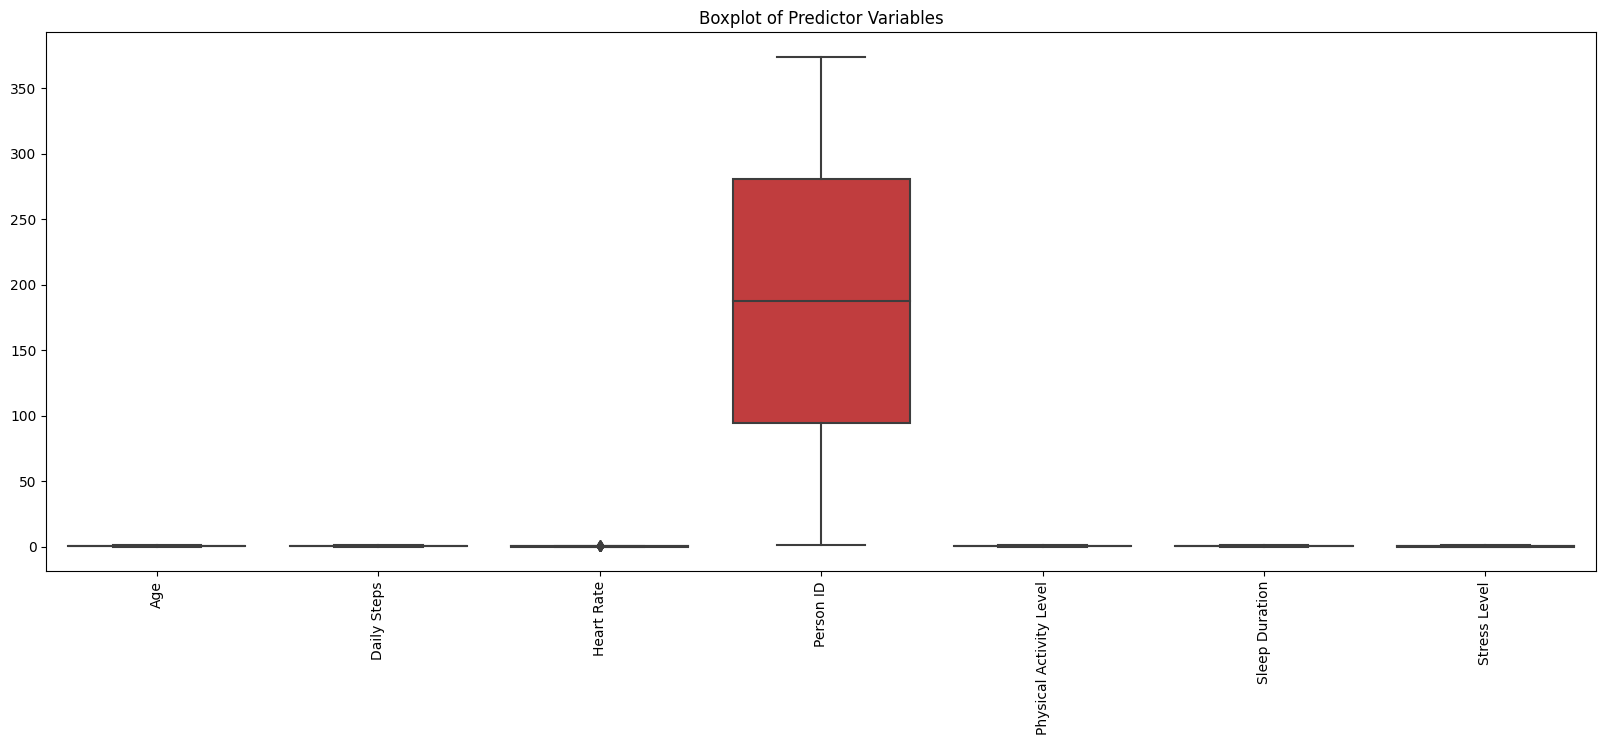

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(20, 7))

# Exclude non-numeric or non-relevant columns. Here I'm just assuming 'Gender', 'Occupation',
# 'BMI Category', 'Blood Pressure', and 'Sleep Disorder' to be the ones you'd exclude.
columns_to_exclude = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
columns_to_plot = data.columns.difference(columns_to_exclude)

# Creating a boxplot for the remaining columns
sns.boxplot(data=data[columns_to_plot])

# Set the plot title
plt.title("Boxplot of Predictor Variables")

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Are the predictor variables independent of all other predictor variables?

In [ ]:

#checking the correlation between all the features in the data
datafinal.corr()

,Person ID,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.212360,-0.811023,-0.516455,-0.039533
Physical Activity Level,0.149882,0.178993,0.212360,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.772723,0.186829,-0.030309,1.000000


In summary, the most notable collinearities in this correlation matrix are between Age and Person ID, and between Physical Activity Level and Daily Steps.

<Axes: >

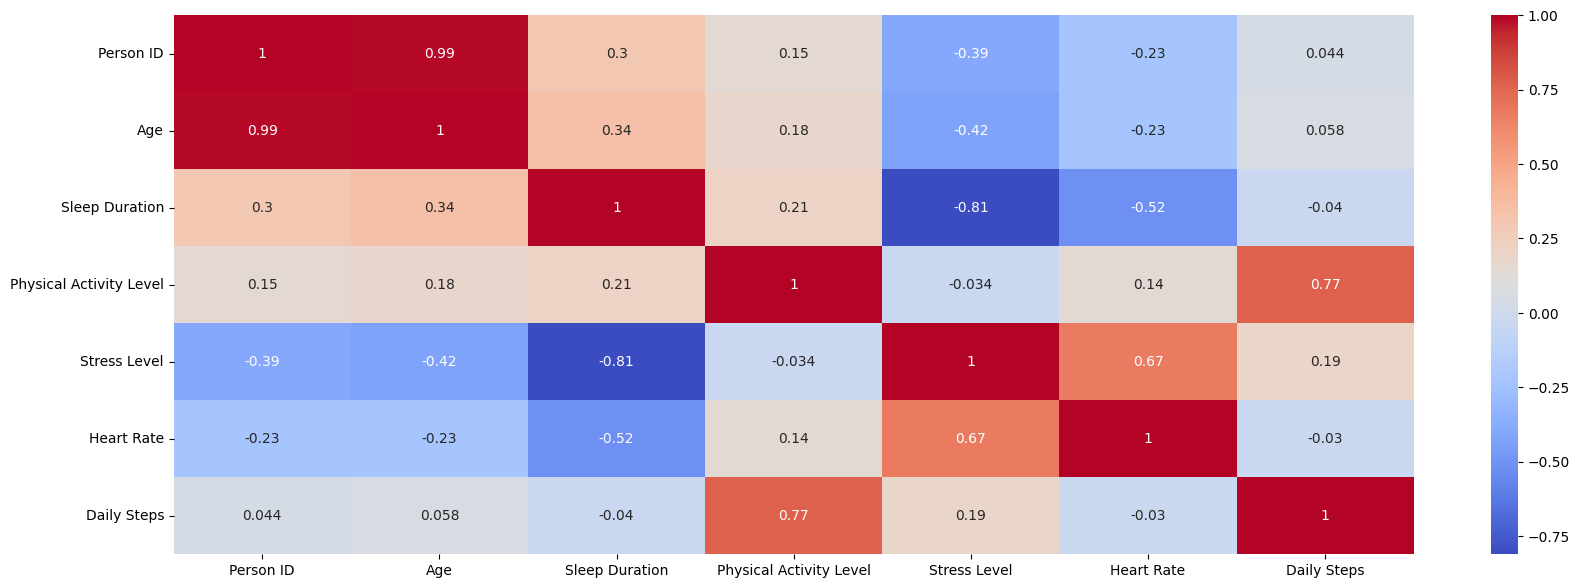

In [ ]:

#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(datafinal.corr(), annot=True, cmap='coolwarm')

From the above heat map, i can conclude that stress level that is -0.034 and physical Activity Level -0.034 has highest collinearity.

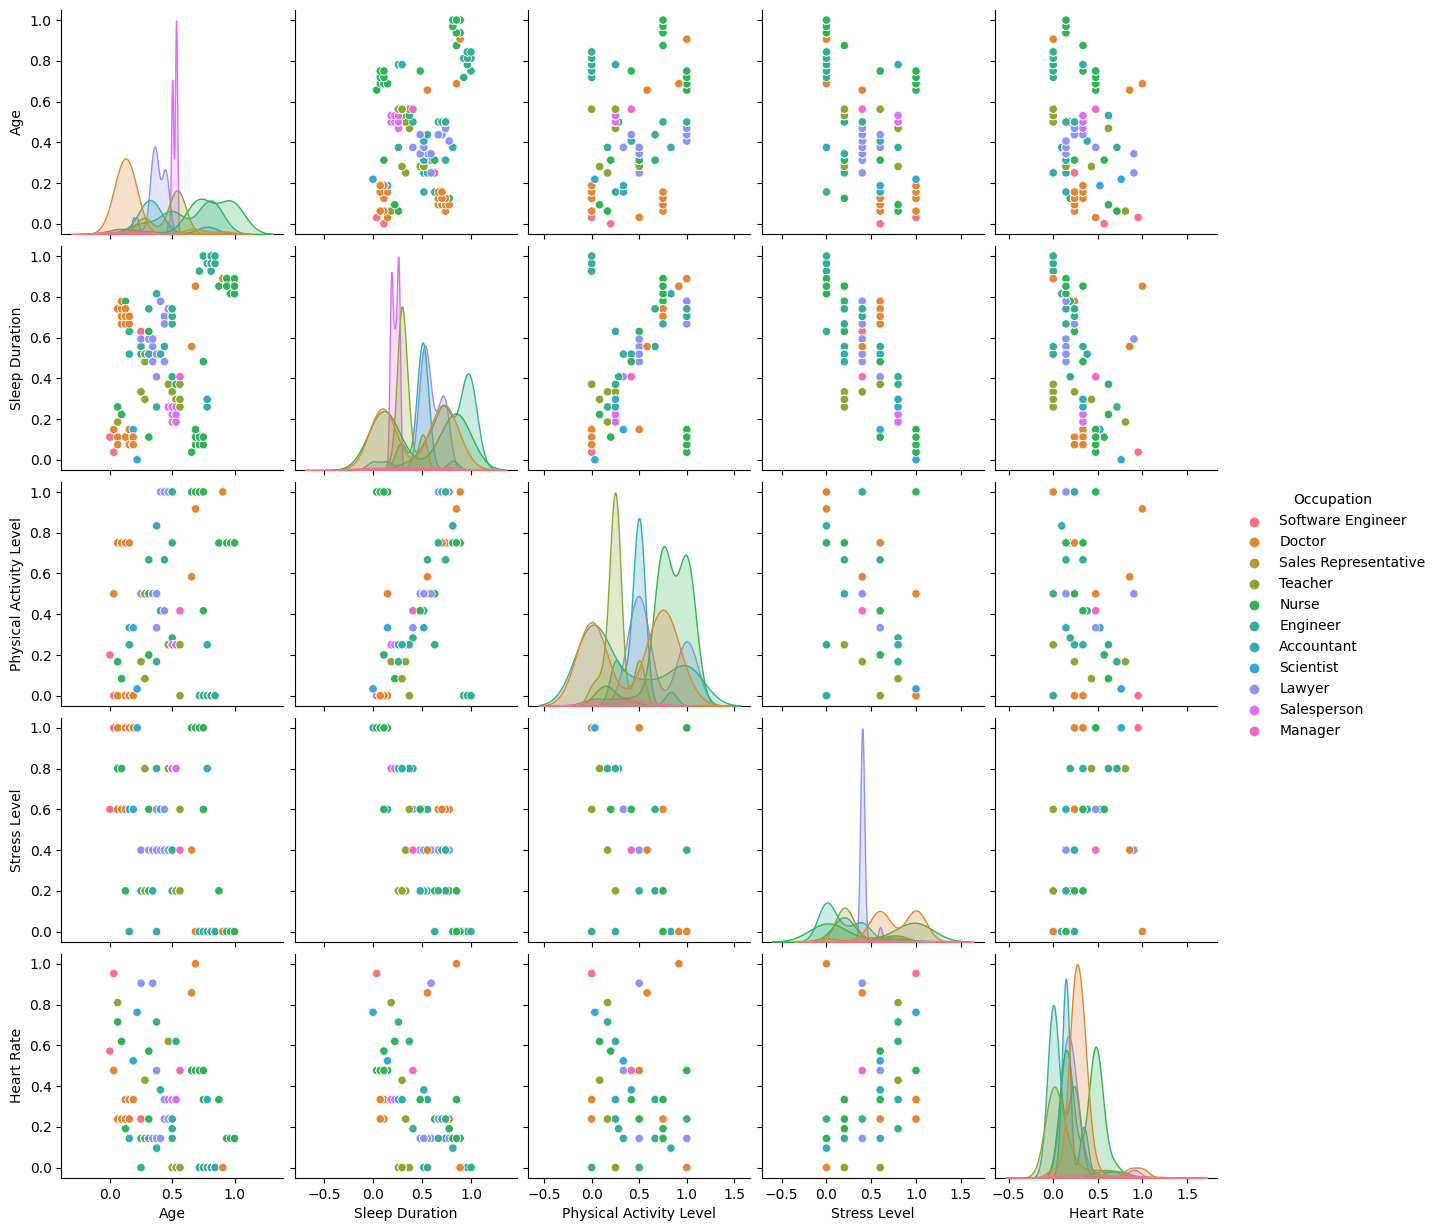

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to check the colinearity
selected_columns = ['Occupation', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
sns.pairplot(data[selected_columns], hue='Occupation')
plt.show()


# Which independent variables are useful to predict a target (dependent variable)?
# Method 1: Using OLS

In [ ]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor variables
data['intercept'] = 1

# Replace the column names from the breast cancer dataset with the relevant columns from your dataset
independent_vars = ['intercept', 'Age', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Assuming you're predicting 'Sleep Duration' for this demonstration
model = sm.OLS(data['Sleep Duration'], data[independent_vars]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sleep Duration   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     170.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.29e-93
Time:                        18:01:12   Log-Likelihood:                 150.70
No. Observations:                 374   AIC:                            -289.4
Df Residuals:                     368   BIC:                            -265.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                   0.8028      0.033     24.597      0.000       0.739       0.867
Age                        -0.0331      0.035     -0.945      0.345      -0.102       0.036
Physical Activity Level     0.2770      0.052      5.282      0.000       0.174       0.380
Stress Level               -0.6021      0.046    -12.984      0.000      -0.693      -0.511
Heart Rate                 -0.1301      0.078     -1.673      0.095      -0.283       0.023
Daily Steps                -0.2003      0.080     -2.497      0.013      -0.358      -0.043
==============================================================================
Omnibus:                        4.631   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.579
Skew:                          -0.271   Prob(JB):                        0.101
Kurtosis:                       2.998   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Builds a linear regression model to determine how the independent variables influence the dependent variable 'Sleep Duration.' The summary provides insights on the strength and significance of these linkages.

## Method 2 :Calculating Z Score

In [ ]:
import pandas as pd

def calculate_z_scores(df):
    return (df - df.mean()) / df.std()

# Selecting columns from your dataset
columns_to_select = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']



# Convert columns to numeric type in case there are any inconsistencies
df = data[columns_to_select].apply(pd.to_numeric, errors='coerce')

z_scores = calculate_z_scores(df)
print(z_scores)


          Age  Sleep Duration  Physical Activity Level  Stress Level  \
0   -1.750750       -1.297149                -0.824314      0.346556   
1   -1.635452       -1.171467                 0.039791      1.473618   
2   -1.635452       -1.171467                 0.039791      1.473618   
3   -1.635452       -1.548514                -1.400384      1.473618   
4   -1.635452       -1.548514                -1.400384      1.473618   
..        ...             ...                      ...           ...   
369  1.938804        1.216498                 0.759878     -1.344036   
370  1.938804        1.090815                 0.759878     -1.344036   
371  1.938804        1.216498                 0.759878     -1.344036   
372  1.938804        1.216498                 0.759878     -1.344036   
373  1.938804        1.216498                 0.759878     -1.344036   

     Heart Rate  Daily Steps  
0      1.652505    -1.617417  
1      1.168908     1.967442  
2      1.168908     1.967442  
3      3.58

 Z-scores are a measure of how far away a particular data point is from the mean of the dataset in terms of standard deviations. They are often used in statistics to standardize data and identify outliers.

# Do the training and test sets have the same data?
Building the Model
Train ,Validation and Test split

In [ ]:
from sklearn.model_selection import train_test_split

# Selecting the independent variables
X = data[['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]

# Dependent variable (target) is 'Sleep Duration'
y = data['Sleep Duration']

# Splitting data into Training 76.5%, Validation set 13.5%, and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


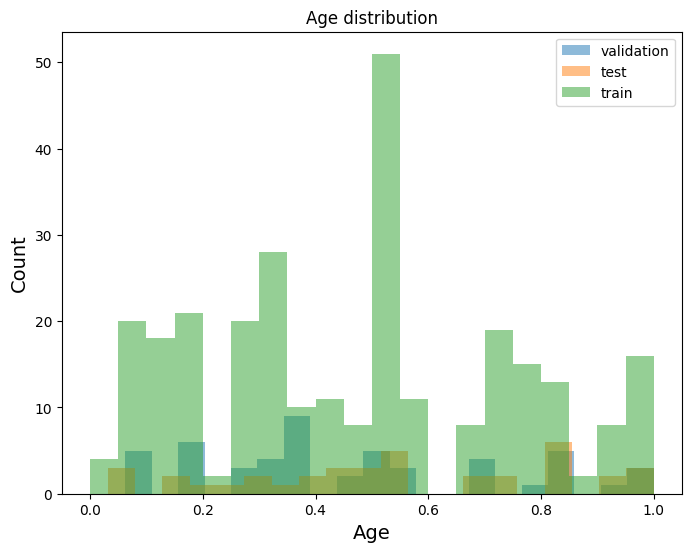

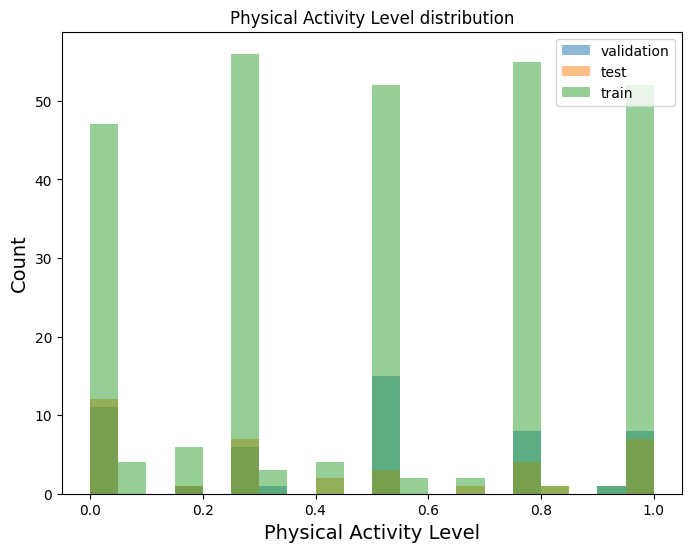

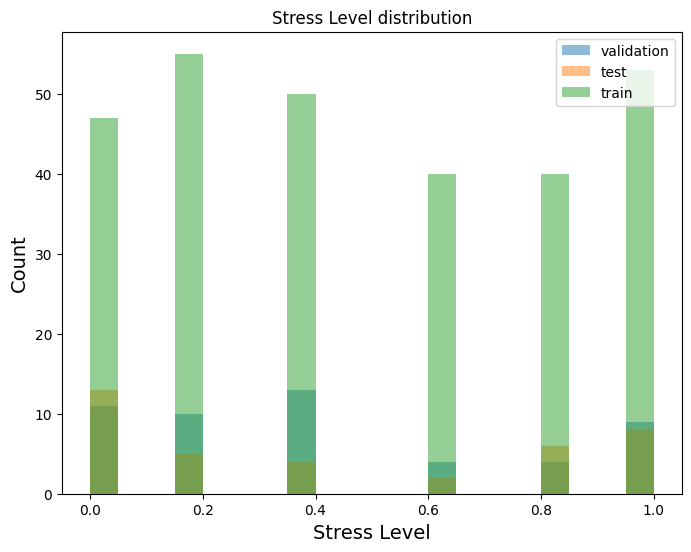

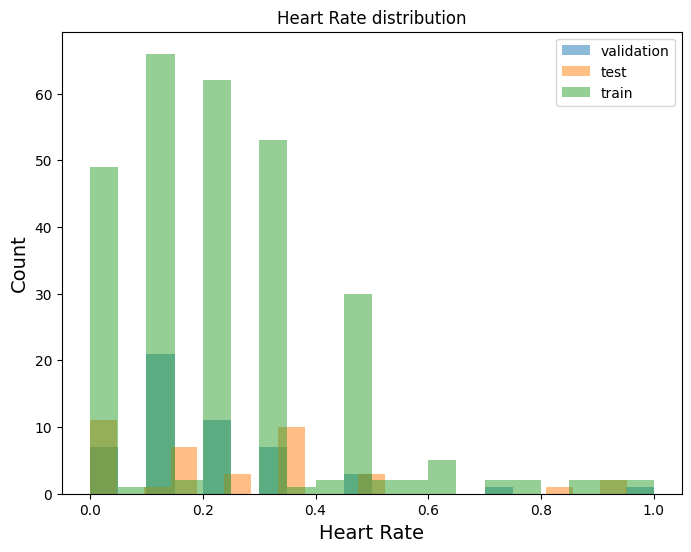

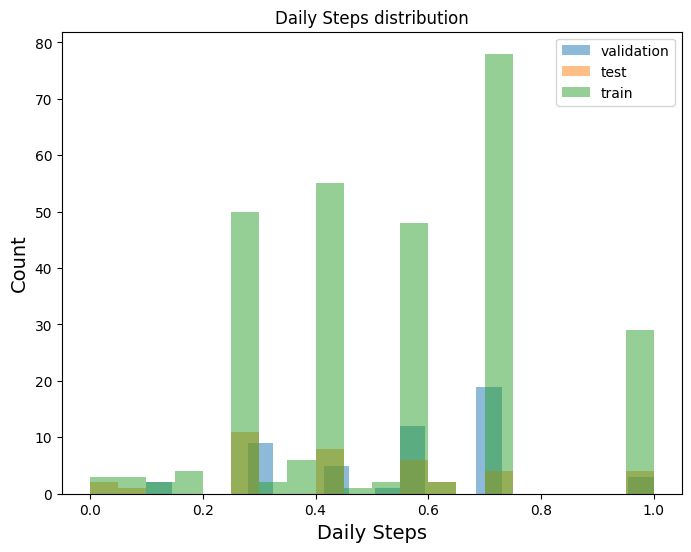

In [ ]:
import matplotlib.pyplot as plt

# Selecting the independent variables
columns_to_plot = ['Age', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

X_test_plot = X_test[columns_to_plot]
X_val_plot = X_val[columns_to_plot]
X_train_plot = X_train[columns_to_plot]

# Plotting the data to see the histogram
for c in columns_to_plot:
    plt.figure(figsize=(8,6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()


The divisions for the datset appears to be distributed correctly for all the variables.

## Method 3 - Using Gradient Boosting Classifier Results

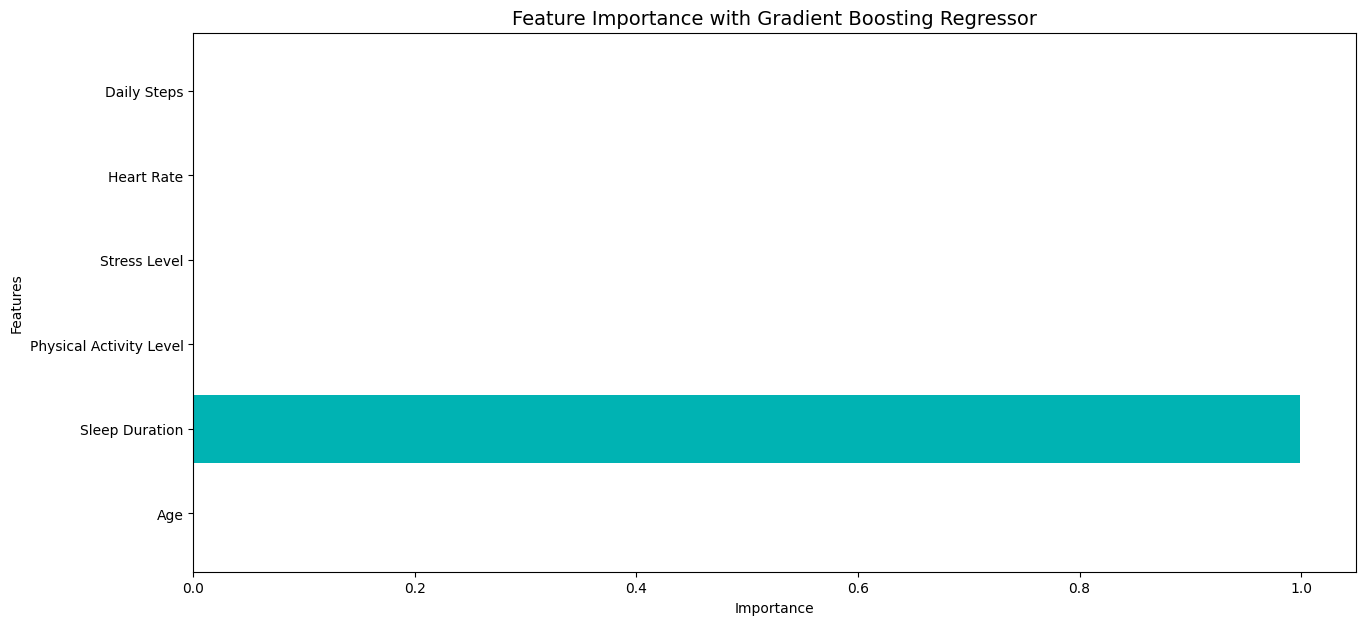

In [ ]:
from sklearn import ensemble
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Regressor
model_3 = ensemble.GradientBoostingRegressor()

# Assuming you've already split your data into train, test, and validation sets using the provided columns
# Fit the model on the training data
model_3.fit(X_train, y_train)

# Get the column names from the training dataset
cols = X_train.columns

# Visualize the feature importances
plt.figure(figsize=(15, 7))
plt.barh(cols, model_3.feature_importances_, color ="#00b3b3")
plt.title('Feature Importance with Gradient Boosting Regressor', size=14)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



Outliers Detection and Removal
### The IQR (Interquartile Range) technique is a method used to detect and remove outliers in a dataset. The IQR is calculated as the difference between the 75th and 25th percentile of the data. Outliers are defined as observations that lie outside of 1.5 times the IQR below the 25th percentile or above the 75th percentile. The values that fall outside this range can be removed or further analyzed to determine if they should be kept in the dataset.

In [ ]:
# Calculates the 25th percentile of the data, represented by the 0.25 quantile
Q1 = data.quantile(0.25)

# Calculates the 75th percentile of the data, represented by the 0.75 quantile
Q3 = data.quantile(0.75)

# Calculates the IQR by subtracting the 25th percentile (Q1) from the 75th percentile (Q3)
IQR = Q3 - Q1

print(IQR)


Person ID                  186.500000
Age                          0.460938
Sleep Duration               0.518519
Physical Activity Level      0.500000
Stress Level                 0.600000
Heart Rate                   0.190476
Daily Steps                  0.342857
intercept                    0.000000
dtype: float64


In [ ]:
# Calculate the IQR for the 'data' dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers from the 'data' dataset
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Displaying the shape of the cleaned dataset
print(data_cleaned.shape)


(354, 14)


calculated the Interquartile range for all the dataset and by removing outliners displayed the shape of the cleaned dataset

## Linear Regression Model

In [ ]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the independent variables from your dataset
X = data[['Age', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]
# Dependent variable (target) is 'Sleep Duration'
y = data['Sleep Duration']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# If you want to see the predicted values:
print(y_pred)


Mean Squared Error: 0.023201569727203487
R^2 Score: 0.7459493910145534
[0.71325148 0.09705632 0.02172416 0.71325148 0.09612834 0.24459793
 0.09520036 0.67150338 0.71232351 0.52128836 0.24459793 0.46600355
 0.52036039 0.09612834 0.52036039 0.19275261 0.39359077 0.24459793
 0.71232351 0.67243135 0.4678595  0.64455272 0.09520036 0.64093773
 0.64000975 0.52128836 0.24459793 0.24552591 0.24552591 0.83984481
 0.46693152 0.71725104 0.46600355 0.83984481 0.19275261 0.67150338
 0.09612834 0.46693152 0.52036039 0.6454807  0.24459793 0.19275261
 0.23642985 0.24552591 0.52221634 0.67150338 0.74706262 0.46507557
 0.09140979 0.46600355 0.84170076 0.57616717 0.19275261 0.64362474
 0.3311174  0.84170076 0.5789511  0.09140979 0.84077278 0.09520036
 0.52128836 0.23717411 0.09520036 0.46600355 0.64093773 0.09520036
 0.24459793 0.71325148 0.64362474 0.49227411 0.67243135 0.24552591
 0.71417946 0.19275261 0.83984481]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

# Evaluate the model
print('Training MSE:', mean_squared_error(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))
print('Training R^2:', r2_score(y_train, y_pred_train))
print('Test R^2:', r2_score(y_test, y_pred_test))



Training MSE: 0.0269305409356762
Test MSE: 0.023201569727203487
Training R^2: 0.6832738786077837
Test R^2: 0.7459493910145534


Calculated Mean square error and r square value for the training and testing

## Making Predictions

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.1302 ± 0.2554,Stress Level
0.2039 ± 0.1065,Physical Activity Level
0.0429 ± 0.0306,Daily Steps
0.0169 ± 0.0068,Heart Rate
0.0002 ± 0.0041,Age


The elif library is used to perform Permutation Importance Analysis and display the feature importance.
Here stress level has highest weight which means stress level has large importance on the performance and the lowes is age which has the lowest importance

### Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?

In [ ]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Convert only numeric columns to float
train_data = data.copy()
train_data[numeric_cols] = train_data[numeric_cols].astype(float)

# List of column names
cols = list(numeric_cols)  # Adjusted to use only numeric columns

# Lists to store randomly selected rows and columns where we will introduce NaN values
all_rows = []
all_cols = []

# Define percentages for which we want to introduce missing values
percent = [0.01, 0.05, 0.1]

for per in percent:
    nan_rows_size = int(per * len(train_data))

    # Select random columns and rows from the numeric columns only
    random_cols = np.random.choice(np.arange(len(cols)), nan_rows_size, replace=True)
    random_rows = np.random.choice(np.arange(len(train_data)), nan_rows_size, replace=False)

    all_rows.append(random_rows)
    all_cols.append(random_cols)

# Creating new dataframes with 1%, 5%, and 10% missing values
predictors_missing_1_percent = train_data.copy()
for r_index, c_index in zip(all_rows[0], all_cols[0]):
    predictors_missing_1_percent.at[r_index, cols[c_index]] = np.NaN

predictors_missing_5_percent = train_data.copy()
for r_index, c_index in zip(all_rows[1], all_cols[1]):
    predictors_missing_5_percent.at[r_index, cols[c_index]] = np.NaN

predictors_missing_10_percent = train_data.copy()
for r_index, c_index in zip(all_rows[2], all_cols[2]):
    predictors_missing_10_percent.at[r_index, cols[c_index]] = np.NaN


In [ ]:
# Printing missing values
print('Number of missing values')
print('1% missing', predictors_missing_1_percent[numeric_cols].isna().sum().sum())  # Ensuring we count NaNs only from numeric columns
print('5% missing', predictors_missing_5_percent[numeric_cols].isna().sum().sum())  # Same here
print('10% missing', predictors_missing_10_percent[numeric_cols].isna().sum().sum())  # And here

# Display the first 5 rows of the original dataset
data.head(5)


Number of missing values
1% missing 3
5% missing 18
10% missing 37


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,intercept
0,1,Male,0.00000,Software Engineer,0.111111,Awesome,0.2,0.6,Overweight,126/83,0.571429,0.171429,None,1
1,2,Male,0.03125,Doctor,0.148148,Awesome,0.5,1.0,Normal,125/80,0.476190,1.000000,None,1
2,3,Male,0.03125,Doctor,0.148148,Awesome,0.5,1.0,Normal,125/80,0.476190,1.000000,None,1
3,4,Male,0.03125,Sales Representative,0.037037,Awesome,0.0,1.0,Obese,140/90,0.952381,0.000000,Sleep Apnea,1
4,5,Male,0.03125,Sales Representative,0.037037,Awesome,0.0,1.0,Obese,140/90,0.952381,0.000000,Sleep Apnea,1


In [ ]:
# Dropping NaN value rows from our 1%, 5%, and 10% missing values dataframe and creating new dataframes
df_1_percent_without_nan = predictors_missing_1_percent.dropna(subset=numeric_cols)
df_5_percent_without_nan = predictors_missing_5_percent.dropna(subset=numeric_cols)
df_10_percent_without_nan = predictors_missing_10_percent.dropna(subset=numeric_cols)

# Display the information of the dataframe with 1% missing values after dropping NaNs
df_1_percent_without_nan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                371 non-null    float64
 1   Gender                   371 non-null    object 
 2   Age                      371 non-null    float64
 3   Occupation               371 non-null    object 
 4   Sleep Duration           371 non-null    float64
 5   Quality of Sleep         371 non-null    object 
 6   Physical Activity Level  371 non-null    float64
 7   Stress Level             371 non-null    float64
 8   BMI Category             371 non-null    object 
 9   Blood Pressure           371 non-null    object 
 10  Heart Rate               371 non-null    float64
 11  Daily Steps              371 non-null    float64
 12  Sleep Disorder           371 non-null    object 
 13  intercept                371 non-null    float64
dtypes: float64(8), object(6)
m

In [ ]:
# Importing the metrics library from sklearn
from sklearn import metrics as sm

# Defining the function to calculate model performance scores for regression
def performance_calculation(y_true, y_pred):
    mse = sm.mean_squared_error(y_true, y_pred)
    mae = sm.mean_absolute_error(y_true, y_pred)
    r2 = sm.r2_score(y_true, y_pred)
    return mse, mae, r2

# Example usage:
# mse, mae, r2 = performance_calculation(y_true_values, y_predicted_values)


In [ ]:
# Specifying columns
num_cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
cat_cols = ['Gender']

# Creating dataframes to store the imputed data
predict_impute_1 = pd.DataFrame()
predict_impute_5 = pd.DataFrame()
predict_impute_10 = pd.DataFrame()

# Imputing numerical columns with median
for col in num_cols:
    predict_impute_1[col] = predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col] = predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col] = predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())

# Imputing categorical columns with mode
for col in cat_cols:
    predict_impute_1[col] = predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode().iloc[0])
    predict_impute_5[col] = predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].mode().iloc[0])
    predict_impute_10[col] = predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].mode().iloc[0])


In [ ]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,intercept
0,1,Male,0.00000,Software Engineer,0.111111,Awesome,0.200000,0.6,Overweight,126/83,0.571429,0.171429,None,1
1,2,Male,0.03125,Doctor,0.148148,Awesome,0.500000,1.0,Normal,125/80,0.476190,1.000000,None,1
2,3,Male,0.03125,Doctor,0.148148,Awesome,0.500000,1.0,Normal,125/80,0.476190,1.000000,None,1
3,4,Male,0.03125,Sales Representative,0.037037,Awesome,0.000000,1.0,Obese,140/90,0.952381,0.000000,Sleep Apnea,1
4,5,Male,0.03125,Sales Representative,0.037037,Awesome,0.000000,1.0,Obese,140/90,0.952381,0.000000,Sleep Apnea,1
5,6,Male,0.03125,Software Engineer,0.037037,Awesome,0.000000,1.0,Obese,140/90,0.952381,0.000000,Insomnia,1
6,7,Male,0.06250,Teacher,0.185185,Awesome,0.166667,0.8,Obese,140/90,0.809524,0.071429,Insomnia,1
7,8,Male,0.06250,Doctor,0.740741,Awesome,0.750000,0.6,Normal,120/80,0.238095,0.714286,None,1
8,9,Male,0.06250,Doctor,0.740741,Awesome,0.750000,0.6,Normal,120/80,0.238095,0.714286,None,1
9,10,Male,0.06250,Doctor,0.740741,Awesome,0.750000,0.6,Normal,120/80,0.238095,0.714286,None,1


In [ ]:
num_cols = ['Age', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Sleep Duration']

cat_cols = ['Sleep Disorder']

predict_impute_1 = pd.DataFrame()
predict_impute_5 = pd.DataFrame()
predict_impute_10 = pd.DataFrame()

# Imputing numerical columns with median
for col in num_cols:
    predict_impute_1[col] = predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col] = predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col] = predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())

# Imputing categorical columns with mode
for col in cat_cols:
    predict_impute_1[col] = predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode().iloc[0])
    predict_impute_5[col] = predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].mode().iloc[0])
    predict_impute_10[col] = predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].mode().iloc[0])


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
import pandas as pd

# Assuming you've already prepared the predict_impute_1, predict_impute_5, and predict_impute_10 dataframes

# Initialize the Decision Tree Classifier
model = tree.DecisionTreeClassifier(random_state=42, max_depth=4)

# For 1% imputed data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(predict_impute_1.drop('Sleep Duration', axis=1), predict_impute_1['Sleep Duration'], test_size=0.25, random_state=42)
model.fit(X_train_1, y_train_1)
accuracy_1_te, auc_1_te, log_loss_1_te, cm_1_te = performnce_calcuation(y_test_1, model.predict(X_test_1))

# For 5% imputed data
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(predict_impute_5.drop('Sleep Duration', axis=1), predict_impute_5['Sleep Duration'], test_size=0.25, random_state=42)
model.fit(X_train_5, y_train_5)
accuracy_5_te, auc_5_te, log_loss_5_te, cm_5_te = performnce_calcuation(y_test_5, model.predict(X_test_5))

# For 10% imputed data
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(predict_impute_10.drop('Sleep Duration', axis=1), predict_impute_10['Sleep Duration'], test_size=0.25, random_state=42)
model.fit(X_train_10, y_train_10)
accuracy_10_te, auc_10_te, log_loss_10_te, cm_10_te = performnce_calcuation(y_test_10, model.predict(X_test_10))


ValueError: ignored

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# Create a copy of the original dataset
imputed_df = data.copy()

# Specify the columns that need imputation
columns_to_impute = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps']

# Percentage of data to impute (1%, 5%, and 10%)
percentages = [0.01, 0.05, 0.10]

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

for percent in percentages:
    # Randomly select a portion of rows to impute
    num_rows_to_impute = int(len(imputed_df) * percent)
    rows_to_impute = imputed_df.sample(num_rows_to_impute)

    # Impute missing values for the selected rows
    for col in columns_to_impute:
        missing_indices = rows_to_impute.index
        predictors = imputed_df.drop('Quality of Sleep', axis=1)  # Drop the target column
        final = imputer.fit_transform(predictors.loc[missing_indices].drop(col, axis=1))
        imputed_df.loc[missing_indices, col] = final[:, predictors.columns.get_loc(col)]

# Now, imputed_df contains the dataset with imputed values for the specified percentages



ValueError: ignored

In [ ]:


print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")


-------------------------------
For 1% Imputation Dataset
-------------------------------


NameError: ignored

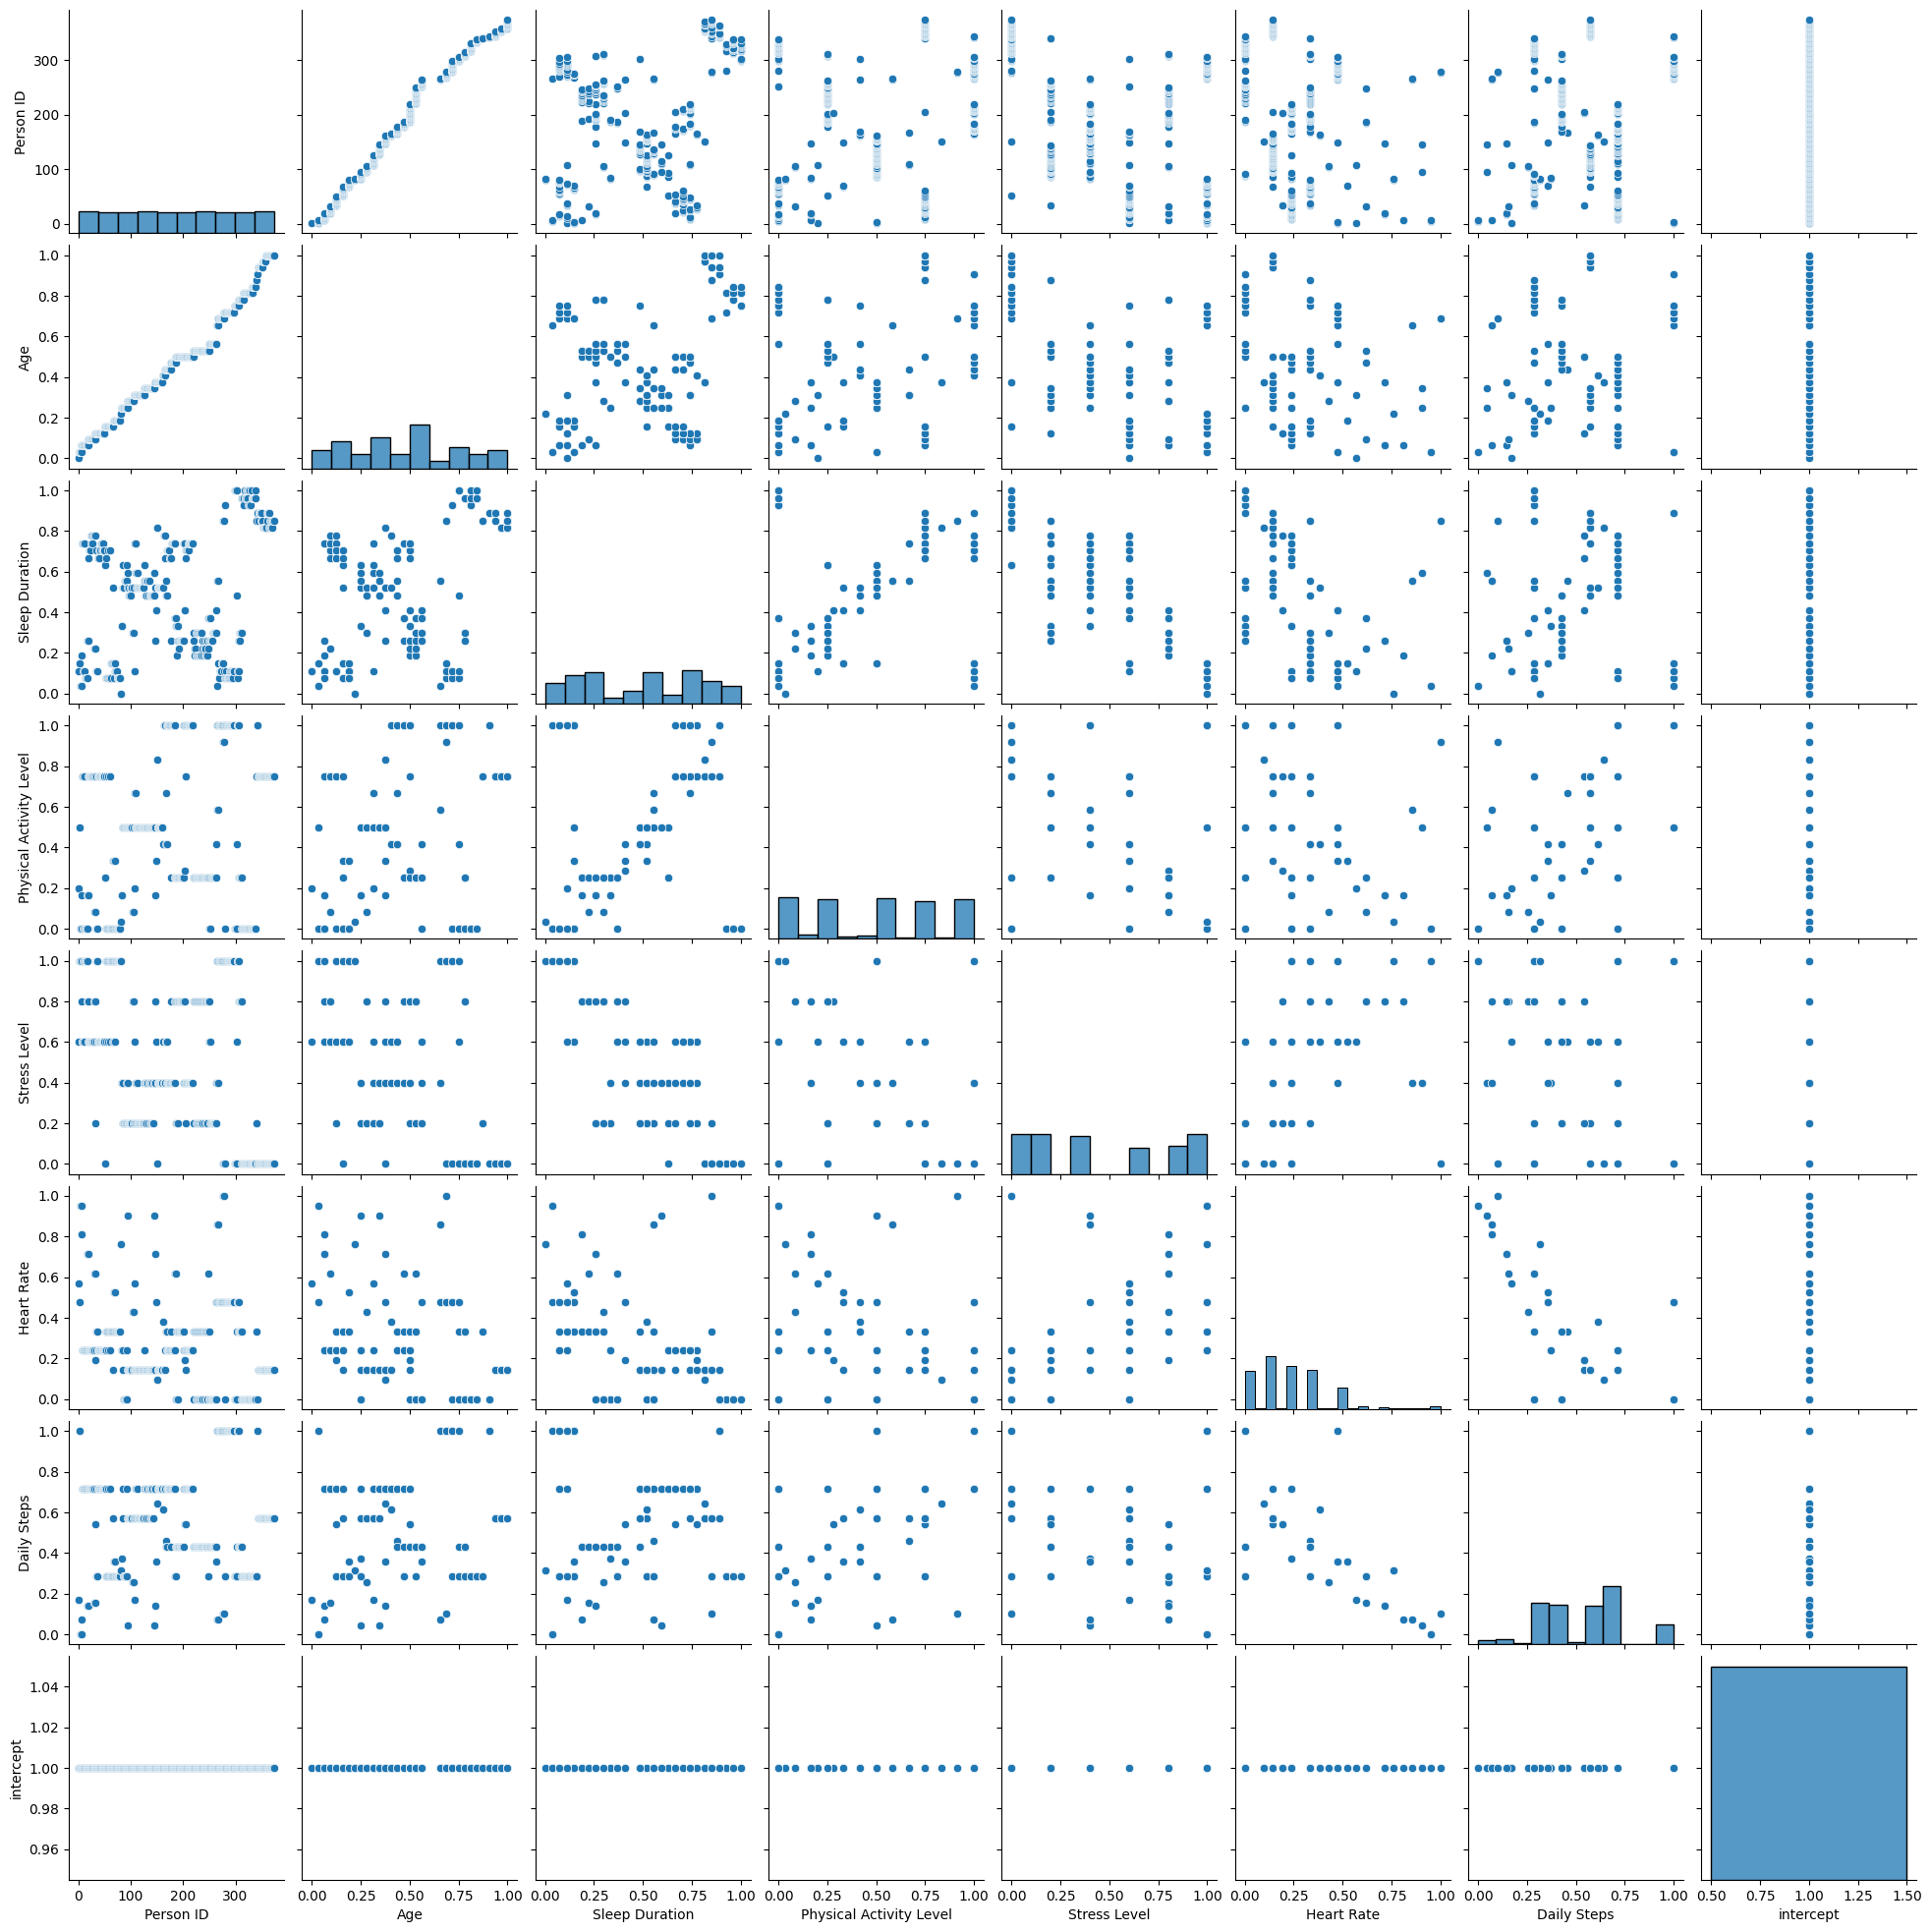

In [ ]:
# pair plot to check the colinearity
sns.pairplot(data)

## **Citations**
1.In this notebook following techniques are taken into consideration

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2.stackoverflow Link - https://stackoverflow.com

3.References have been taken from the seaborn webpage for charts and visualization Link - https://seaborn.pydata.org

4.Missing Values in Data https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

# **License**
Copyright 2023 Akanksha Nakati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.